In [1]:
import h5py as hp
import pandas as pd
import numpy as np
import time as tm
import itertools

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df=pd.read_hdf('msno_artist_percent.h5','a')
df=df[df['SP']==2]
df.head(100)

,msno,artist_id,SP,number,sum_number,percent
0,7,14,2,1,1,1.000000
2,7,584,2,2,5,0.400000
3,7,1139,2,1,1,1.000000
5,7,3404,2,2,5,0.400000
6,7,5301,2,1,1,1.000000
7,7,6650,2,2,2,1.000000
9,7,6651,2,9,11,0.818182
14,7,25560,2,1,1,1.000000
16,7,29702,2,2,3,0.666667
19,7,43934,2,2,3,0.666667


In [3]:
df.shape

(94849790, 6)

In [4]:
df['max_number']=df.groupby('msno')['number'].transform('max')
data=df[df['number']==df['max_number']]
data

,msno,artist_id,SP,number,sum_number,percent,max_number
9,7,6651,2,9,11,0.818182,9
36,17,82,2,70,71,0.985915,70
157,18,331821,2,170,171,0.994152,170
186,22,21688,2,22,23,0.956522,22
207,22,50340,2,22,23,0.956522,22
308,70,3083,2,1794,1831,0.979792,1794
380,116,43934,2,245,305,0.803279,245
543,298,5967,2,8,9,0.888889,8
618,324,6651,2,70,72,0.972222,70
832,334,2578468,2,142,144,0.986111,142


In [5]:
data.shape

(1554877, 7)

In [12]:
data2=data.groupby('artist_id')['number'].sum().reset_index().sort_values('number',ascending=False)
data2=data2.reset_index(drop=True)
data2

,artist_id,number
0,4261,9216291
1,6651,6495920
2,43934,3282039
3,5301,2154137
4,8280,2110150
5,49897,2079639
6,6931185,1816899
7,2750938,1808152
8,2578468,1789484
9,2993763,1583112


In [13]:
data2['group']=data2.index
data2

,artist_id,number,group
0,4261,9216291,0
1,6651,6495920,1
2,43934,3282039,2
3,5301,2154137,3
4,8280,2110150,4
5,49897,2079639,5
6,6931185,1816899,6
7,2750938,1808152,7
8,2578468,1789484,8
9,2993763,1583112,9


In [14]:
data2['W']=data2['group'].apply(lambda n : 1 if n<3500 else 2 if n<7000 else 3 if n< 10500 else 4)
data2

,artist_id,number,group,W
0,4261,9216291,0,1
1,6651,6495920,1,1
2,43934,3282039,2,1
3,5301,2154137,3,1
4,8280,2110150,4,1
5,49897,2079639,5,1
6,6931185,1816899,6,1
7,2750938,1808152,7,1
8,2578468,1789484,8,1
9,2993763,1583112,9,1


In [31]:
data2['W']=data2['group'].apply(lambda n : 1 if n<5000 else 2 if n<13000 else 3 if n< 15000 else 4 if n< 17000 else 6)
data2

,artist_id,number,group,W
0,4261,9216291,0,1
1,6651,6495920,1,1
2,43934,3282039,2,1
3,5301,2154137,3,1
4,8280,2110150,4,1
5,49897,2079639,5,1
6,6931185,1816899,6,1
7,2750938,1808152,7,1
8,2578468,1789484,8,1
9,2993763,1583112,9,1


In [32]:
S=data2.groupby(['W'])['number'].sum().reset_index()
S

,W,number
0,1,107115523
1,2,800824
2,3,7490
3,4,2157
4,6,354


In [33]:
R=data2.groupby(['W']).count().reset_index().drop('group',axis=1)
R

,W,artist_id,number
0,1,5000,5000
1,2,8000,8000
2,3,2000,2000
3,4,2000,2000
4,6,354,354


In [34]:
R=R.drop('number',axis=1)
E=R.merge( S, on='W', how='left')
E

,W,artist_id,number
0,1,5000,107115523
1,2,8000,800824
2,3,2000,7490
3,4,2000,2157
4,6,354,354


In [35]:
E['F']=np.log10(E.artist_id)
E['FF']=np.log10(E.number)
E

,W,artist_id,number,F,FF
0,1,5000,107115523,3.698970,8.029852
1,2,8000,800824,3.903090,5.903537
2,3,2000,7490,3.301030,3.874482
3,4,2000,2157,3.301030,3.333850
4,6,354,354,2.549003,2.549003


In [36]:
E.to_csv('01.csv',sep=',',encoding='utf-8',index=False)

In [42]:
data2['lg1']=np.log10(data2.number)
data2['lg2']=np.log10(1)
data2.to_csv('00.csv',sep=',',encoding='utf-8',index=False)

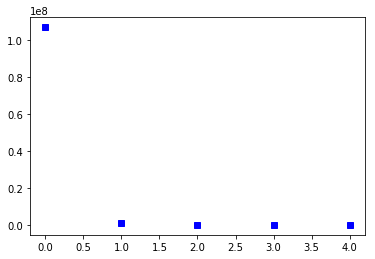

In [37]:
'''
import numpy as np
import matplotlib.pyplot as plt


# red dashes, blue squares and green triangles
plt.plot(E.number ,'bs')
plt.show()
'''

In [ ]:
#data.drop_duplicates(subset='artist_id', keep='first', inplace=False).sort_values('number',ascending=False)

## ‵‵--

In [47]:
dr=data.groupby('artist_id')['msno'].count().reset_index().sort_values('msno',ascending=False)#.to_csv('TT.csv',sep=',',encoding='utf-8',index=False)
dr

,artist_id,msno
806,4261,122248
1116,6651,81639
1252,8280,38940
12965,2993763,37061
955,5301,36442
5146,43934,34306
5639,49897,32733
12273,2578468,31640
4855,40080,29516
5767,52634,26047


In [48]:
dr=dr.reset_index(drop=True)
dr

,artist_id,msno
0,4261,122248
1,6651,81639
2,8280,38940
3,2993763,37061
4,5301,36442
5,43934,34306
6,49897,32733
7,2578468,31640
8,40080,29516
9,52634,26047


In [49]:
dr['id']=dr.index
dr

,artist_id,msno,id
0,4261,122248,0
1,6651,81639,1
2,8280,38940,2
3,2993763,37061,3
4,5301,36442,4
5,43934,34306,5
6,49897,32733,6
7,2578468,31640,7
8,40080,29516,8
9,52634,26047,9


In [50]:
dr['W']=dr['id'].apply(lambda n : 1 if n<5000 else 2 if n<13000 else 3 if n< 15000 else 4 if n< 17000 else 6)
dr

,artist_id,msno,id,W
0,4261,122248,0,1
1,6651,81639,1,1
2,8280,38940,2,1
3,2993763,37061,3,1
4,5301,36442,4,1
5,43934,34306,5,1
6,49897,32733,6,1
7,2578468,31640,7,1
8,40080,29516,8,1
9,52634,26047,9,1


In [51]:
SS=dr.groupby(['W'])['msno'].sum().reset_index()
SS

,W,msno
0,1,1531167
1,2,19356
2,3,2000
3,4,2000
4,6,354


In [52]:
RR=dr.groupby(['W']).count().reset_index()#.drop('group',axis=1)
RR

,W,artist_id,msno,id
0,1,5000,5000,5000
1,2,8000,8000,8000
2,3,2000,2000,2000
3,4,2000,2000,2000
4,6,354,354,354


In [53]:
RR=RR.drop(['msno','id'],axis=1)
RR

,W,artist_id
0,1,5000
1,2,8000
2,3,2000
3,4,2000
4,6,354


In [54]:
EE=RR.merge( SS, on='W', how='left')
EE

,W,artist_id,msno
0,1,5000,1531167
1,2,8000,19356
2,3,2000,2000
3,4,2000,2000
4,6,354,354


In [55]:
EE['Z']=np.log10(EE.artist_id)
EE['X']=np.log10(EE.msno)
EE

,W,artist_id,msno,Z,X
0,1,5000,1531167,3.698970,6.185023
1,2,8000,19356,3.903090,4.286816
2,3,2000,2000,3.301030,3.301030
3,4,2000,2000,3.301030,3.301030
4,6,354,354,2.549003,2.549003


In [56]:
EE.to_csv('TT2.csv',sep=',',encoding='utf-8',index=False)